In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('economic_index.csv')

In [3]:
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [7]:
df.drop(['Unnamed: 0','year','month'], inplace=True,axis=1)

In [8]:
df.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [9]:
df.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

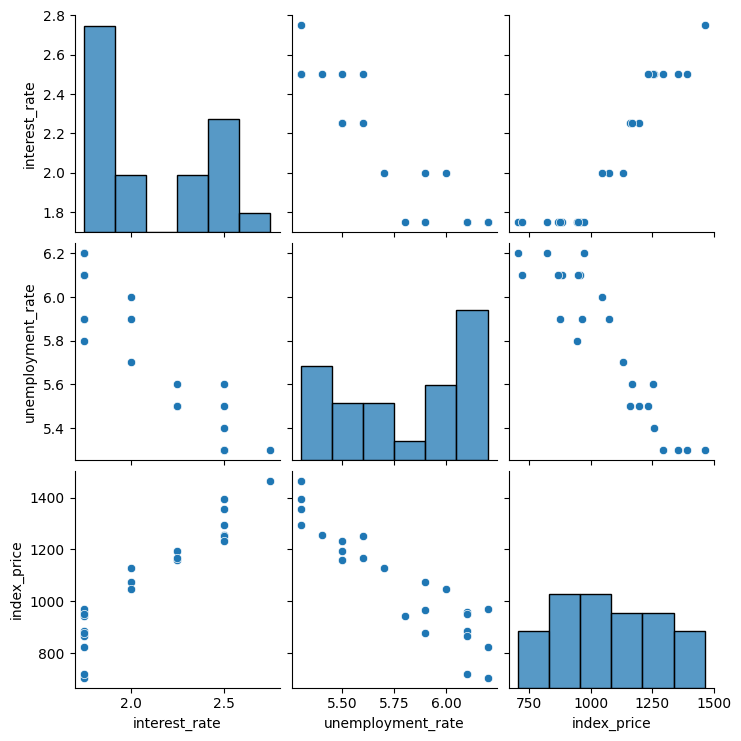

In [10]:
import seaborn as sns
sns.pairplot(df)

Text(0, 0.5, 'Unemployment Rate')

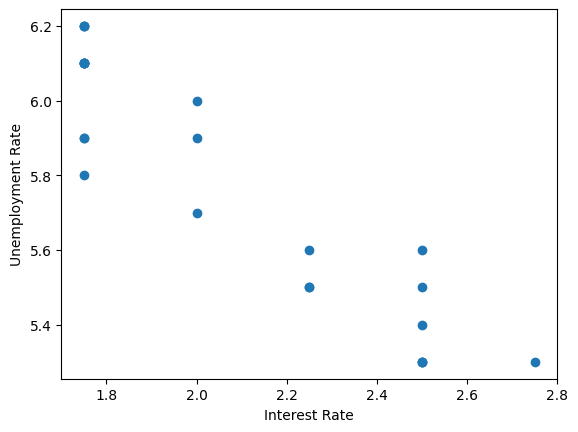

In [12]:
plt.scatter(df['interest_rate'], df['unemployment_rate'])
plt.xlabel('Interest Rate')
plt.ylabel('Unemployment Rate')

In [13]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

<Axes: xlabel='index_price', ylabel='interest_rate'>

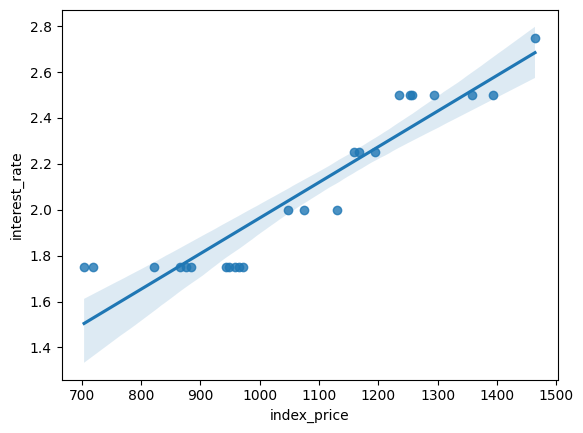

In [26]:
sns.regplot(x=df['index_price'],y=df['interest_rate'])

<Axes: xlabel='unemployment_rate', ylabel='interest_rate'>

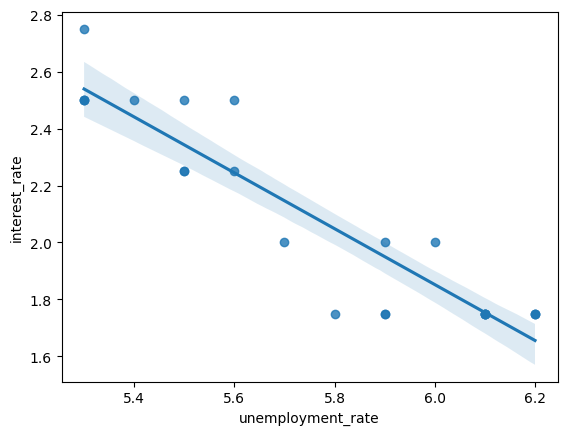

In [24]:
sns.regplot(x=df['unemployment_rate'],y=df['interest_rate'])

<Axes: xlabel='index_price', ylabel='unemployment_rate'>

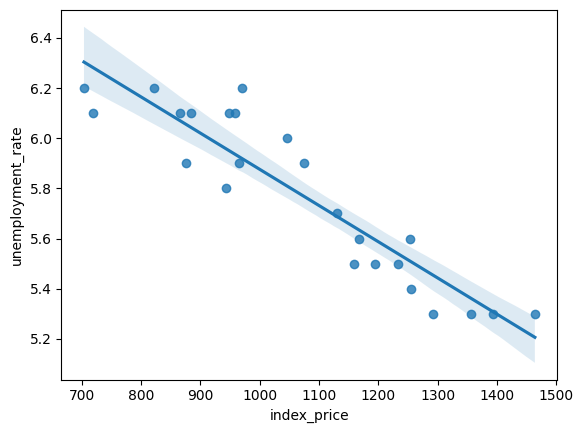

In [23]:
sns.regplot(x=df['index_price'],y=df['unemployment_rate'])

In [27]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()

In [29]:
X_train=std.fit_transform(X_train)
X_test=std.fit_transform(X_test)

In [30]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()

In [31]:
regression.fit(X_train,y_train)

LinearRegression()

Cross-validation checks how well the model will perform on unseen data by training and testing it on multiple different splits of the training dataset.

✔ Returning the negative of MSE instead of positive MSE

Because then:

A better model → smaller MSE → larger (less negative) score

A bad model → bigger MSE → more negative score

In [35]:
## cross validation

from sklearn.model_selection import cross_val_score
validation=cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',cv=5)

In [37]:
validation

array([-1861.74046551, -8715.8459466 , -7707.52362191, -9169.13776461,
        -791.32842311])

In [36]:
np.mean(validation)

np.float64(-5649.115244350758)

In [38]:
y_pred=regression.predict(X_test)

In [39]:
y_pred

array([1180.7466813 ,  802.74279699, 1379.83457045,  838.52599602,
        973.85313963, 1144.96348227])

In [44]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
MSE=mean_squared_error(y_test,y_pred)
MAE=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(MSE)
print(MSE,MAE,rmse)

8108.567426306604 73.80444932337097 90.04758423359621


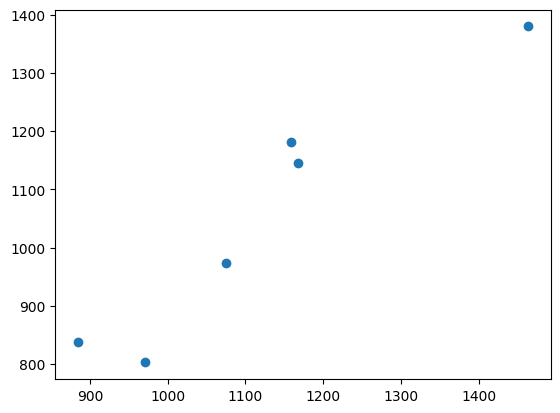

In [45]:
plt.scatter(y_test,y_pred)

In [ ]:
residual=y_test-y_pred
residual

8     -21.746681
16    168.257203
0      84.165430
18     45.474004
11    101.146860
9      22.036518
Name: index_price, dtype: float64

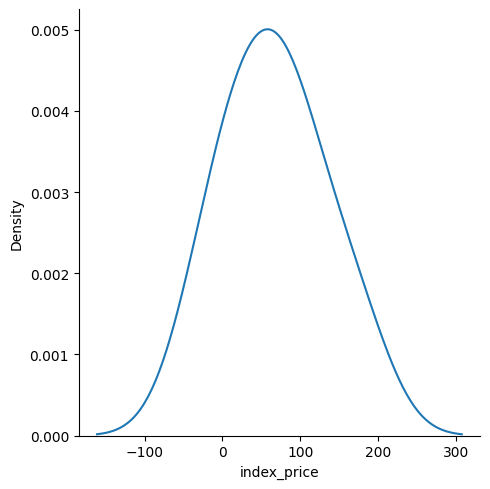

In [48]:
sns.displot(residual,kind='kde')

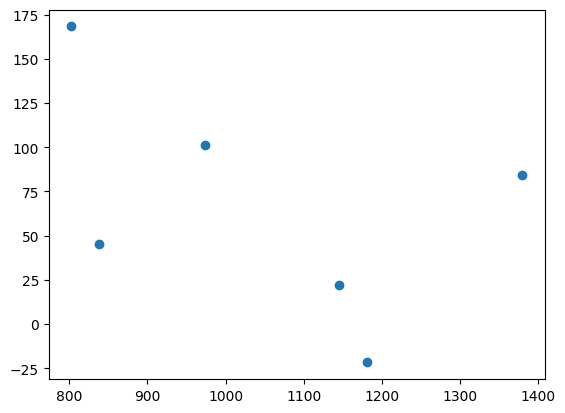

In [49]:
plt.scatter(y_pred,residual)